## Q1

In [2]:
def collinear(array) -> bool:
    slopes = []
    x_1 = array[0][0]
    y_1 = array[0][1]

    for idx in range(1, len(array)):
        # calculate difference between two points
        x_diff = x_1 - array[idx][0]
        y_diff = y_1 - array[idx][1]

        # calculate slopes
        slopes.append(y_diff/x_diff)

        # set new reference point
        x_1 = array[idx][0]
        y_1 = array[idx][1]

    if len(set(slopes)) != 1:
        return False
    else:
        return True

assert collinear([[1,1], [2,2], [4,4], [-10, -10]]) == True
assert collinear([[1,0], [2,0], [3,1]]) == False


## Q2

In [3]:
from collections import Counter

def last_digit_counts(number_list):
    last_digits = [int(str(x)[-1]) for x in number_list]
    return dict(Counter(last_digits))
    

last_digit_counts([49, 10, 20, 5, 30, 785]) 

{9: 1, 0: 3, 5: 2}

## Q3

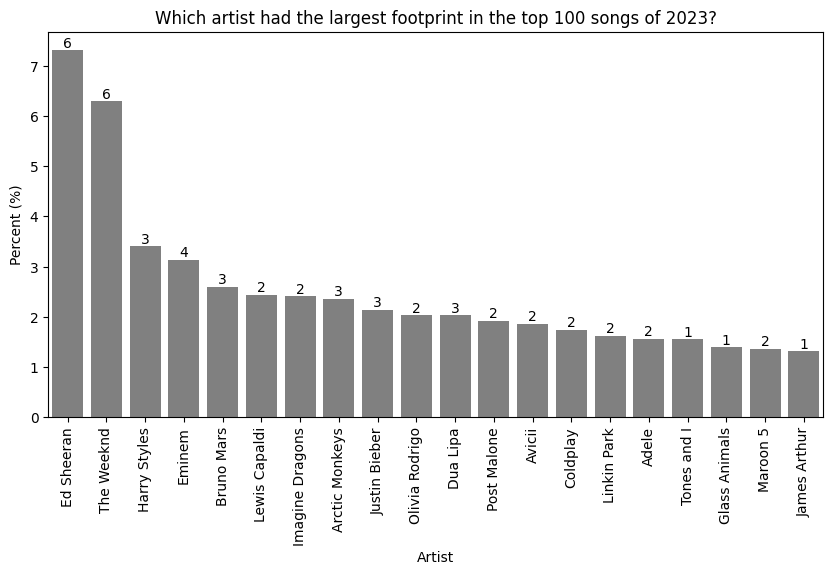

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load in dataset
df = pd.read_excel('sandbox/spotify-2023.xlsx')
df.sort_values('Streams', ascending=False, inplace=True)
# Trim to top 100 most streamed songs
df = df[:100]

# The question we want to answer is "which artist had the largest footprint in the top 100 songs of 2023"
# However, we know that some artists collaborated with others.
# To resolve this, we will explode out each individual artist (e.g. Justin Bieber, The Weeknd becomes two rows) and divide the streams equally amongst them.
# We'll do this in 3 steps:

# 1) Feature engineering to identify the number of artists in each song
df['Num Artists'] = [str(x).count(',')+1 for x in df['Artist']]

# 2) Divide the stream equally by the number of artists
df['Streams'] = (df['Streams']/df['Num Artists']).astype(int)

# 3) Explode out the rows where there are multiple artists
artist_solo = df[['Artist', 'Streams']].set_index('Streams').apply(lambda x: x.str.split(',').explode()).reset_index()
artist_streams = artist_solo.groupby('Artist').agg(
    Streams=('Streams', 'sum'),
    Songs=('Streams', 'count')).sort_values('Streams', ascending=False)

# Data clean up and create a separate top 20 artists df to plot
artist_streams['Streams'] = artist_streams['Streams']/1000000
artist_streams['Streams Percent'] = (artist_streams['Streams']/artist_streams['Streams'].sum())*100
top20 = artist_streams[:20].reset_index()

# Plot parameters
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(data=top20, x='Artist', y='Streams Percent', color='gray')
ax.bar_label(ax.containers[0], labels=top20['Songs'])
plt.xticks(rotation=90)
plt.ylabel('Percent (%)')
plt.title('Which artist had the largest footprint in the top 100 songs of 2023?')
plt.show()


A3)   
An effective visualization answers a simple question. The question I wanted to answer is: 

*"Which artist had the largest footprint in the top 100 songs of 2023*".

The above plot shows the top 20 artists who had the largest share of streams of 2023. Each bar denotes a single artist, the y-axis denotes the percent of streams the artist occupied, and the number on the bar denotes the number of songs they had in the top 100. A single statement we can make is that the top 5 artists (i.e. Ed Sheeran, The Weekend, Harry Styles, Eminem, and Bruno Mars) occupied 25% of the traffic and collectively had 24 songs in the top 100!

## Q4
Q4) If you flip a fair coin 100 times (independently), 
what is the chance that more than 60 flips come up heads? 
     Do not try to compute this value exactly; instead, use 
     the simplest "good" approximation you can come up with.
     You should not write any code for this problem.

A4) If we're looking at coin flips, we can treat the outcomes as a binomial distribution. Given a large enough sample, and as long as the probability is not 0 or 1, the binomial distribution will approach a normal distribution. However, since we have a fair coin (p = 0.5) then a normal distribution will be approached much quicker (i.e. 100 samples should be more than enough to assume normality in a fair coin). Therefore, we can estimate the probability of getting 60 or more heads by looking at a simulated distribution.
If we simulate a binomial distribution with 100 flips, we can estimate the probability of getting 60 or more heads as a little larger than 2 standard deviations. 2 standard deviations is approximately 2%. Therefore, getting 60 or more heads has a less than 2% probability. 



## Q5
Q5) What are some Python libraries (or libraries in other
     programming languages) you think are fun or interesting to work with? 
     pandas and scikit-learn are both very useful, but I'd argue
     they're not so fun or interesting.


A5) I'm a sucker for organization so any tool that helps me with that gets high praises. With that said, when developing models locally, I'm a big fan of using Optuna. It's a hyperparameter tuning library that comes complete with various search algorithms, allows for runs in parallel, and importantly a database that checkpoints each run and synchronizes all runs. That last part is crucial for efficient search and for continuing on if something crashes! Plus it works great with MLFlow if you need a dashboard for visualizing all the runs.

## Q6
Q6) What tools do you use to help you code productively? 
     For example, what editor/IDE do you prefer? Testing framework? Linter?
     Command line utilities? Other tools you like or recommend to friends?
     Is there something you've discovered recently but haven’t 
     had time to learn yet?


A6) 
My fondness for organization and communication stems from my PhD and delivering various data science solutions. In these settings I had to collaborate with multiple individuals, clients, and teams to deliver a research paper or a product. To ensure orderly information, clear communication, and efficient execution I've adopted various tools into my workflow as a data scientist. Specifically, these tools are VSCode for coding, iTerm with PowerLevel10k for my CLI, Sublime Text for viewing/mocking up various file formats, Miro and Excalidraw to sketch and collaborate on solution or system architectures, and Obsidian for note-taking and prioritization of tasks. 

I've been wanting to learn a lot more about A/B tests. My role as a data scientist has mostly centered around client discovery, building MVPs, and productionzing them but never about product refinement. This is due to not having a large enough customer base/usage for a tool to refine various aspects about a product. I'm currently reading the book Trustworthy Online Controlled Experiments to develop a strong foundation before connecting that to the practical tools in software.
